# WZL Automobile Data processing

Objective: identify if a coil is somehow different from existing observations.()

In [78]:
import csv
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
#from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
import io
import os

path=r"D:\ubuntu\WZL-2018\Automobil_training_data"
filename = path + '\\Datenbasis_Gefiltert.csv'
df = pd.read_csv(filename, usecols=['Position', 'CoilNumber','ProgramNumber630','Banddicke1','Banddicke2','Banddicke3','Banddicke','Impoc'])
#df = df.dropna(axis=0,subset=['Banddicke2','Impoc'])
df

c:\users\xiaoli yang\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ProgramNumber630,Position,CoilNumber,Banddicke,Banddicke1,Banddicke2,Banddicke3,Impoc
0,130.0,5.504,962167,0.7,NaN,NaN,NaN,2426.0
1,130.0,8.944,962167,0.7,NaN,NaN,NaN,2671.0
2,130.0,12.384,962167,0.7,NaN,NaN,NaN,2715.0
3,130.0,15.824,962167,0.7,NaN,NaN,NaN,2798.0
4,130.0,19.264,962167,0.7,NaN,NaN,NaN,2913.0
5,130.0,22.704,962167,0.7,NaN,NaN,NaN,2866.0
6,130.0,26.144,962167,0.7,NaN,NaN,NaN,2814.0
7,130.0,29.584,962167,0.7,NaN,NaN,NaN,2804.0
8,130.0,33.024,962167,0.7,NaN,NaN,NaN,2794.0
9,130.0,36.464,962167,0.7,NaN,NaN,NaN,2778.0


## Step 2

After loading the Columns we wanted, we'd better combine the two table(with producer)

In [79]:
zrd=pd.read_csv(os.path.join(path,'Zuordnung.csv'),header=0,sep=',')
zrd.rename(index=str,columns ={'programm_coil':'ProgramNumber630',
'material gemaess SAP':'Material',
'Hersteller/Schluessel':'Hersteller'},inplace = True)
print('length zrd {:d}'.format(len( zrd.loc[:,'ProgramNumber630'].unique() ) ) )
print('length df {:d}' .format(len( df.loc[:,'ProgramNumber630'].unique() ) ) )
print(df.shape)

df=pd.merge(df, zrd, how='left', on=['ProgramNumber630'])
print(df.shape)
df.to_pickle(os.path.join(path,'Datenbasis_Gefiltert_zusammengefuehrt.csv'))
df.keys()
df

length zrd 19
length df 17
(1048575, 8)
(1048575, 11)


,ProgramNumber630,Position,CoilNumber,Banddicke,Banddicke1,Banddicke2,Banddicke3,Impoc,Material,Hersteller,Coilbreite
0,130,5.504,962167,0.7,NaN,NaN,NaN,2426.0,DX54D + Z100 MCO,CV,1550.0
1,130,8.944,962167,0.7,NaN,NaN,NaN,2671.0,DX54D + Z100 MCO,CV,1550.0
2,130,12.384,962167,0.7,NaN,NaN,NaN,2715.0,DX54D + Z100 MCO,CV,1550.0
3,130,15.824,962167,0.7,NaN,NaN,NaN,2798.0,DX54D + Z100 MCO,CV,1550.0
4,130,19.264,962167,0.7,NaN,NaN,NaN,2913.0,DX54D + Z100 MCO,CV,1550.0
5,130,22.704,962167,0.7,NaN,NaN,NaN,2866.0,DX54D + Z100 MCO,CV,1550.0
6,130,26.144,962167,0.7,NaN,NaN,NaN,2814.0,DX54D + Z100 MCO,CV,1550.0
7,130,29.584,962167,0.7,NaN,NaN,NaN,2804.0,DX54D + Z100 MCO,CV,1550.0
8,130,33.024,962167,0.7,NaN,NaN,NaN,2794.0,DX54D + Z100 MCO,CV,1550.0
9,130,36.464,962167,0.7,NaN,NaN,NaN,2778.0,DX54D + Z100 MCO,CV,1550.0


## Step 3

* denoising

1. dropna
2. delete duplicate
3. choose only one Hersteller.

In [ ]:
# as for the precision round(3)
df.dropna(axis=0, how='any',inplace=True)
df.round(3)
df.drop_duplicates(subset=['Position'],inplace=True)
df.shape



## Step 3.1 

let's say we choose the `Hersteller CV` and the `Branddicke=0.7`


In [ ]:
df_cv = df.loc[(df['Hersteller'] == 'CV') & (df['Banddicke'] == 0.7)]
#df_cv = df_cv.drop(columns = ['CoilNumber','Material','Hersteller'])
#df_cv

## Step 4

before we start our training, we can take a deeper look inside of our data to say what's good or not.

1. group the data by the coilnumber

In [ ]:
coilNr = df_cv.drop_duplicates(subset=['CoilNumber'], keep='last', inplace=False).CoilNumber.values # it will return a series.
i=1
for s in df_cv.groupby('CoilNumber'):
   #print(s[1]['Banddicke2'].values)
    if(s[1].size<8000):
        continue
    xx = pd.DataFrame({'Position':s[1]['Position'].values,'Banddicke2':s[1]['Banddicke2'].values})
    #print(s[1].size)
    xx.plot(x='Position',y='Banddicke2',title=s[0])

## Step 4.1 Setup the Autoencoder based on Tensorflow

In [ ]:
# reform the data into matrix as a unit
# s in df_cv.groupby('CoilNumber'):
import random

df_matrix = pd.DataFrame([])

# how long the step size should be
Step = 500

for s in df_cv.groupby('CoilNumber'):
    
    #matrx = pd.DataFrame([s[1].Position.values, s[1].Banddicke1.values, s[1].Banddicke2.values, s[1].Banddicke3.values])
    #matrx = np.split(',')
    #matrx = np.transpose(matrx)
    #comp = Step - (matrx.shape[0] % Step)
    #new = matrx[-1]
    #new = np.tile(new, comp)
    #length = matrx.shape[0]
    #matrx = np.append(matrx,new).shape(length+comp,4)
    comp = Step - s[1].shape[0] % Step
    matrx = s[1].filter(items=['Position', 'Banddicke1','Banddicke2','Banddicke3'])
    ran = matrx[-1:]['Position'].values
    for i in range(int(comp)):
        ranPos = random.uniform(1, ran)
        d2 = pd.DataFrame([[ranPos,0.7,0.7,0.7]], columns= ['Position', 'Banddicke1', 'Banddicke2', 'Banddicke3'])
        matrx  = matrx.append(d2)
    df_matrix = df_matrix.append(matrx)
    #print(s[1].filter(items=['Position', 'Banddicke1','Banddicke2','Banddick3']))
    
df_matrix.shape  

In [ ]:
from sklearn.preprocessing import StandardScaler

RANDOM_SEED = 42

X_train, X_test = train_test_split(df_matrix, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train.values
X_test = X_test.values
X_train.shape

input_dim = X_train.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)


## Step 5
train the module

In [ ]:
import h5py

nb_epoch = 100
batch_size = 32
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history



## 5.1 Evaluation


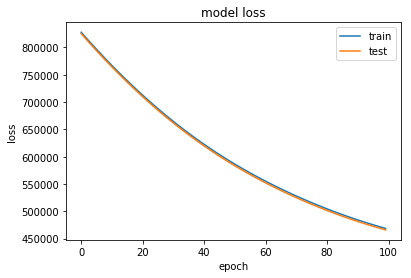

In [16]:
autoencoder = load_model('model.h5')

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
#error_df = pd.DataFrame({'reconstruction_error': mse,
#                        'true_class': y_test})
#error_df.describe()

In [15]:

df2 = df.filter(items=['CoilNumber'])
#find the unique coilNr
coilNr = df2.drop_duplicates(subset=None, keep='last', inplace=False) 
df2 = df.filter(items =['Position','Impoc'])
df2 = df2.astype(dtype='double') 


CoilSet = dict()
#coilNr['index']
coilNr
#for row in coilNr.itertuples():
#    row[1]
#  xy= xy.cumsum() sum the former up
#xy.plot(kind = 'line', x='Position', y = 'Impoc')


,CoilNumber
27030,9615733
30222,9652795
35186,5831401
35888,585324108
36678,863790315
37488,863791161
38317,863789319
43432,5823801
57935,9404342
58895,9609201


In [2]:
df.Branddicke2

AttributeError: 'DataFrame' object has no attribute 'Branddicke2'